# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import pandas as pd
fraud_detection = pd.read_csv ('fd.csv')
fraud =fraud_detection.sample(100000)
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5415868,378,CASH_OUT,286729.26,C604428728,4012.0,0.0,C1201735611,0.00,286729.26,0,0
1319228,136,CASH_OUT,120037.92,C1025795973,0.0,0.0,C1335058396,2662254.85,2782292.77,0,0
5439235,378,CASH_OUT,208556.61,C816411868,0.0,0.0,C1682977610,2456580.98,2665137.59,0,0
5274805,372,CASH_OUT,112825.67,C322458003,0.0,0.0,C1047448161,265373.43,506651.07,0,0
762987,38,CASH_OUT,59604.09,C1395382671,0.0,0.0,C1623027152,1008696.71,1068300.80,0,0


In [2]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.542990,1.808468e+05,8.121884e+05,8.321837e+05,1.088650e+06,1.212757e+06,0.001430,0.000010
std,142.650835,6.298210e+05,2.828971e+06,2.863743e+06,3.245445e+06,3.543040e+06,0.037788,0.003162
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,155.000000,1.328263e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.352456e+04,1.343000e+04,0.000000e+00,1.311449e+05,2.111643e+05,0.000000,0.000000
75%,335.000000,2.079192e+05,1.060240e+05,1.399411e+05,9.399304e+05,1.109848e+06,0.000000,0.000000
max,738.000000,5.204280e+07,3.795009e+07,3.816670e+07,2.405919e+08,2.885448e+08,1.000000,1.000000


In [12]:
fraud.shape

(100000, 8)

In [16]:
fraud.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [13]:
fraud.isna().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [3]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

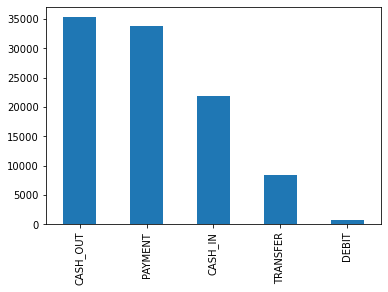

In [15]:
fraud['type'].value_counts()[:11].plot(kind = "bar")

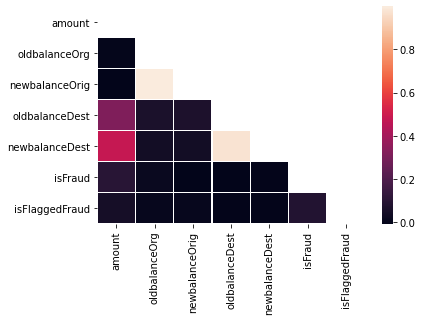

In [11]:
import seaborn as sns
import numpy as np
corr_matrix=np.triu(fraud.corr())
sns.heatmap(fraud.corr(),linewidths=.5,mask=corr_matrix)

In [14]:
fraud.corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
amount,1.000000,0.000812,-0.006544,0.318577,0.481293,0.101413,0.049302
oldbalanceOrg,0.000812,1.000000,0.998479,0.067015,0.041673,0.017449,0.010716
newbalanceOrig,-0.006544,0.998479,1.000000,0.068789,0.041524,-0.006796,0.010564
oldbalanceDest,0.318577,0.067015,0.068789,1.000000,0.976833,-0.007139,-0.001061
newbalanceDest,0.481293,0.041673,0.041524,0.976833,1.000000,-0.000574,-0.001082
isFraud,0.101413,0.017449,-0.006796,-0.007139,-0.000574,1.000000,0.083565
isFlaggedFraud,0.049302,0.010716,0.010564,-0.001061,-0.001082,0.083565,1.000000


In [ ]:
#the most important features to determine the outcomes could be: 'amount', 'isFraud', 'newbalanceOrig'/'oldbalanceOrg' and 'newbalanceDest'/oldbalanceDest'.

### What is the distribution of the outcome? 

In [4]:
fraud['isFraud'].value_counts()

0    99857
1      143
Name: isFraud, dtype: int64

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [5]:
fraud.drop(['step','nameOrig', 'nameDest'],axis=1,inplace=True) #droping the columns that seem not to be useful

In [21]:
type_encoded = pd.get_dummies(fraud['type']) #using get dummies to transform 'type' column
fraud = pd.concat([fraud,type_encoded], axis=1)
fraud.drop('type', axis=1, inplace=True)
fraud.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
5415868,286729.26,4012.0,0.0,0.00,286729.26,0,0,0,1,0,0,0
1319228,120037.92,0.0,0.0,2662254.85,2782292.77,0,0,0,1,0,0,0
5439235,208556.61,0.0,0.0,2456580.98,2665137.59,0,0,0,1,0,0,0
5274805,112825.67,0.0,0.0,265373.43,506651.07,0,0,0,1,0,0,0
762987,59604.09,0.0,0.0,1008696.71,1068300.80,0,0,0,1,0,0,0


In [22]:
fraud.dtypes

amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
CASH_IN             uint8
CASH_OUT            uint8
DEBIT               uint8
PAYMENT             uint8
TRANSFER            uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X= fraud.drop(["isFraud","isFlaggedFraud"],axis=1)
y= fraud["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model_log = LogisticRegression().fit(X_train,y_train)
model_log.score(X_test,y_test)

0.99545

### Now pick a model of your choice and evaluate its accuracy.

In [44]:
from sklearn.model_selection import GridSearchCV
import xgboost
n_estimators = [60]
max_depth = [15,30]
grid = {'n_estimators':n_estimators,
       'max_depth':max_depth}
xgb_reg = xgboost.XGBRegressor(n_estimators=60,max_depth=30)
grid_search = GridSearchCV(estimator=xgb_reg,param_grid=grid,cv=5)

In [45]:
xgb_reg = xgboost.XGBRegressor(n_estimators=60,max_depth=30)
xgb_reg.fit(X_train, y_train)
xgb_reg.score(X_test,y_test)

0.70804258165924

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train, y_train)
knn_model.score(X_test, y_test)

0.9994

In [48]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1) 
forest_model.fit(X_train, y_train)
forest_model.score(X_test,y_test)

0.99965

In [51]:
from sklearn.tree import DecisionTreeRegressor

decisiontree = DecisionTreeRegressor()

decisiontree_model = decisiontree.fit(X_train, y_train)
  
decisiontree_model.score(X_test, y_test)

0.599399098647972

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)
gboost.score(X_test,y_test)

0.9992

### Which model worked better and how do you know?

In [ ]:
#The best model was KNN (0.9994), followed by GradientBoostingClassifier(0.9992).

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.